In [1]:
import pandas as pd

In [2]:
url_inv = "https://open.canada.ca/data/dataset/3ac0d080-6149-499a-8b06-7ce5f00ec56c/resource/3acf79c0-a5f5-4d9a-a30d-fb5ceba4b60a/download/service_inventory.csv"
url_std = "https://open.canada.ca/data/dataset/3ac0d080-6149-499a-8b06-7ce5f00ec56c/resource/272143a7-533e-42a1-b72d-622116474a21/download/service_standards.csv"

In [3]:
df_inv = pd.read_csv(url_inv)

In [4]:
df_inv.head()

,fiscal_yr,service_id,service_name_en,service_name_fr,department_name_en,department_name_fr,external_internal,service_type,special_designations,service_description_en,...,other_applications,e_registration,e_authentication,e_application,e_decision,e_issuance,e_feedback,client_feedback,special_remarks_en,special_remarks_fr
0,2016-2017,135,Farm Debt Mediation Service,Service de médiation en matière d'endettement ...,Agriculture and Agri-Food Canada,Agriculture et Agroalimentaire Canada,extern,res,"prior,crit",Provides financial counselling and mediation s...,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"The use of""NA"" in the SIN column is an indica...",NaN
1,2016-2017,136,AgriMarketing Program Assurance Systems,"Programme Agri-marketing, volet Systèmes d'ass...",Agriculture and Agri-Food Canada,Agriculture et Agroalimentaire Canada,extern,res,prior,Provides funding for the development of nation...,...,0,NaN,NaN,Y,Y,N,N,NaN,NaN,NaN
2,2016-2017,137,AgriMarketing Program Market Development,"Programme Agri-marketing, volet Développement ...",Agriculture and Agri-Food Canada,Agriculture et Agroalimentaire Canada,extern,res,prior,Provides funding to industry associations and ...,...,0,NaN,NaN,Y,Y,N,N,NaN,NaN,NaN
3,2016-2017,138,AgriInnovation Program Industry-led Research a...,"Programme Agri-innovation, Activités de recher...",Agriculture and Agri-Food Canada,Agriculture et Agroalimentaire Canada,extern,res,prior,Provides support for pre-commercialization Res...,...,0,NaN,NaN,Y,Y,N,N,NaN,NaN,NaN
4,2016-2017,139,AgriInnovation Program Enabling Commercializat...,"Programme Agri-innovation, Facilitation de la ...",Agriculture and Agri-Food Canada,Agriculture et Agroalimentaire Canada,extern,res,prior,Provides repayable contributions to approved i...,...,0,NaN,NaN,Y,Y,N,N,NaN,NaN,NaN


In [5]:
df_inv.describe()

,fiscal_yr,service_id,service_name_en,service_name_fr,department_name_en,department_name_fr,external_internal,service_type,special_designations,service_description_en,...,other_applications,e_registration,e_authentication,e_application,e_decision,e_issuance,e_feedback,client_feedback,special_remarks_en,special_remarks_fr
count,1865,1865,1865,1865,1865,1865,1865,1865,1865,1865,...,1865,1139,1224,1306,1330,1218,1488,1343,1240,1075
unique,3,1232,1337,1355,67,68,12,74,9,1416,...,265,2,2,2,2,2,2,99,746,648
top,2018-2019,1464,Public Enquiries,Demandes des médias,"Immigration, Refugees and Citizenship Canada","Immigration, Réfugiés et Citoyenneté Canada",extern,reg,non,"The Program makes use of regulatory measures, ...",...,0,Y,N,N,N,N,Y,"tel,onl",This service is not available through other se...,Ce service n'est pas disponible via d'autres m...
freq,1180,5,9,4,226,226,1461,558,1135,9,...,892,575,691,725,783,723,749,143,37,42


In [6]:
df_inv.columns

Index(['fiscal_yr', 'service_id', 'service_name_en', 'service_name_fr',
       'department_name_en', 'department_name_fr', 'external_internal',
       'service_type', 'special_designations', 'service_description_en',
       'service_description_fr', 'service_url_en', 'service_url_fr',
       'program_name_en', 'program_name_fr', 'last_GBA',
       'client_target_groups', 'info_service', 'service_fee',
       'cra_business_number', 'use_of_sin', 'service_channels',
       'online_applications', 'web_visits_info_service', 'calls_received',
       'in_person_applications', 'postal_mail_applications',
       'other_applications', 'e_registration', 'e_authentication',
       'e_application', 'e_decision', 'e_issuance', 'e_feedback',
       'client_feedback', 'special_remarks_en', 'special_remarks_fr'],
      dtype='object')

# Data Cleanup

## Numeric columns

In [7]:
#Convert object columns to numeric data type.
numeric_columns = ['web_visits_info_service', 'calls_received', 'online_applications', 'in_person_applications', 'postal_mail_applications', 'other_applications']
for col in numeric_columns:
    df_inv[col] = pd.to_numeric(df_inv[col], errors = 'coerce')

In [34]:
#Sum total applications
column_list=['online_applications', 'in_person_applications', 'postal_mail_applications', 'other_applications']
df_inv["total_applications"]=df_inv[column_list].sum(axis=1)

## Department name

AS observed noted by Dia, data over all three years is only available for 11 departments. We restrict ourselves to these.

For more information, read comments [here](https://open.canada.ca/data/en/dataset/3ac0d080-6149-499a-8b06-7ce5f00ec56c).

In [35]:
df_inv.fiscal_yr.unique()

array(['2016-2017', '2017-2018', '2018-2019'], dtype=object)

In [36]:
departments = df_inv[df_inv.fiscal_yr == '2016-2017'].department_name_en.unique()
df_inv_relevantDeps = df_inv[df_inv.department_name_en.isin(departments)]
df_inv_relevantDeps.shape

(1034, 38)

In [37]:
df_inv_relevantDeps.head()

,fiscal_yr,service_id,service_name_en,service_name_fr,department_name_en,department_name_fr,external_internal,service_type,special_designations,service_description_en,...,e_registration,e_authentication,e_application,e_decision,e_issuance,e_feedback,client_feedback,special_remarks_en,special_remarks_fr,total_applications
0,2016-2017,135,Farm Debt Mediation Service,Service de médiation en matière d'endettement ...,Agriculture and Agri-Food Canada,Agriculture et Agroalimentaire Canada,extern,res,"prior,crit",Provides financial counselling and mediation s...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"The use of""NA"" in the SIN column is an indica...",NaN,282.0
1,2016-2017,136,AgriMarketing Program Assurance Systems,"Programme Agri-marketing, volet Systèmes d'ass...",Agriculture and Agri-Food Canada,Agriculture et Agroalimentaire Canada,extern,res,prior,Provides funding for the development of nation...,...,NaN,NaN,Y,Y,N,N,NaN,NaN,NaN,16.0
2,2016-2017,137,AgriMarketing Program Market Development,"Programme Agri-marketing, volet Développement ...",Agriculture and Agri-Food Canada,Agriculture et Agroalimentaire Canada,extern,res,prior,Provides funding to industry associations and ...,...,NaN,NaN,Y,Y,N,N,NaN,NaN,NaN,141.0
3,2016-2017,138,AgriInnovation Program Industry-led Research a...,"Programme Agri-innovation, Activités de recher...",Agriculture and Agri-Food Canada,Agriculture et Agroalimentaire Canada,extern,res,prior,Provides support for pre-commercialization Res...,...,NaN,NaN,Y,Y,N,N,NaN,NaN,NaN,29.0
4,2016-2017,139,AgriInnovation Program Enabling Commercializat...,"Programme Agri-innovation, Facilitation de la ...",Agriculture and Agri-Food Canada,Agriculture et Agroalimentaire Canada,extern,res,prior,Provides repayable contributions to approved i...,...,NaN,NaN,Y,Y,N,N,NaN,NaN,NaN,36.0


## Selecting relevant columns

In [52]:
df_inv_online_data = df_inv_relevantDeps[['department_name_en', 'web_visits_info_service', 'online_applications', 'other_applications']]
df_inv_online_data.head()

,department_name_en,web_visits_info_service,online_applications,other_applications
0,Agriculture and Agri-Food Canada,0.0,282.0,0.0
1,Agriculture and Agri-Food Canada,0.0,16.0,0.0
2,Agriculture and Agri-Food Canada,0.0,141.0,0.0
3,Agriculture and Agri-Food Canada,0.0,29.0,0.0
4,Agriculture and Agri-Food Canada,0.0,36.0,0.0


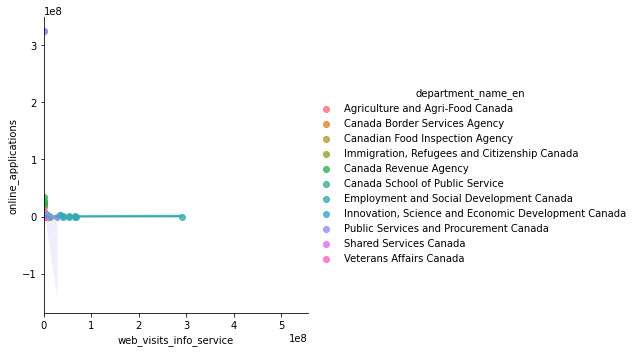

In [53]:
import matplotlib.pyplot as plt
import seaborn as sb

sb.lmplot('web_visits_info_service','online_applications', data = df_inv_online_data, hue ='department_name_en')
#ax.scatter(df_inv.web_visits_info_service, df_inv.online_applications)

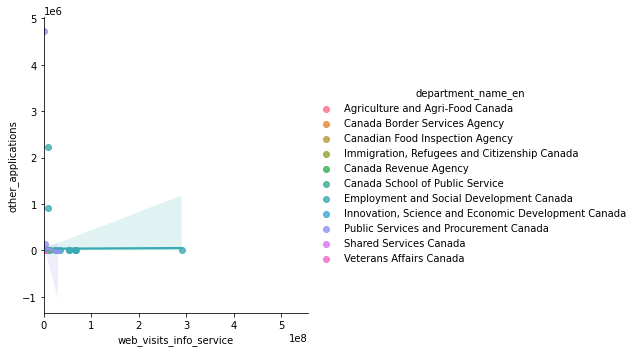

In [54]:
sb.lmplot('web_visits_info_service','other_applications', data = df_inv_online_data, hue ='department_name_en')

In [40]:
df_inv_online_data = df_inv_online_data.groupby('department_name_en').agg('sum')
df_inv_online_data

,web_visits_info_service,online_applications,total_applications
department_name_en,,,
Agriculture and Agri-Food Canada,8.259110e+05,379289.0,445198.0
Canada Border Services Agency,0.000000e+00,58285401.0,361843302.0
Canada Revenue Agency,8.707000e+04,291896755.0,364237975.0
Canada School of Public Service,2.607287e+06,425.0,1374.0
Canadian Food Inspection Agency,0.000000e+00,5705.0,510456.0
Employment and Social Development Canada,1.343734e+09,15753276.0,85466623.0
"Immigration, Refugees and Citizenship Canada",8.627656e+07,19191782.0,44523794.0
"Innovation, Science and Economic Development Canada",1.769771e+07,8839475.0,8981460.0
Public Services and Procurement Canada,8.495145e+07,663757757.0,705019066.0


(array([-2.,  0.,  2.,  4.,  6.,  8., 10., 12.]),
 <a list of 8 Text major ticklabel objects>)

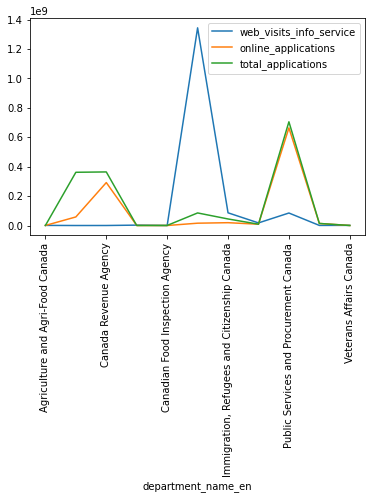

In [41]:
df_inv_online_data.plot()
plt.xticks(rotation = 90)

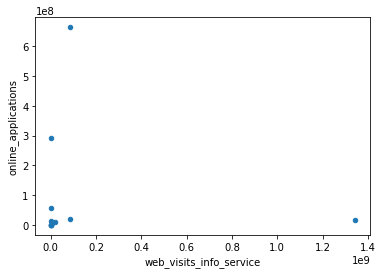

In [42]:
df_inv_online_data.plot(kind='scatter',x='web_visits_info_service',y='online_applications')

## Seperating by Year

Looking at same data above, seperated by year. (Just curious)

In [43]:
df_inv_online_data_w_yr = df_inv_relevantDeps[[
'fiscal_yr','department_name_en', 'web_visits_info_service', 'online_applications']]
df_inv_online_data_w_yr.head()

,fiscal_yr,department_name_en,web_visits_info_service,online_applications
0,2016-2017,Agriculture and Agri-Food Canada,0.0,282.0
1,2016-2017,Agriculture and Agri-Food Canada,0.0,16.0
2,2016-2017,Agriculture and Agri-Food Canada,0.0,141.0
3,2016-2017,Agriculture and Agri-Food Canada,0.0,29.0
4,2016-2017,Agriculture and Agri-Food Canada,0.0,36.0


2016-2017


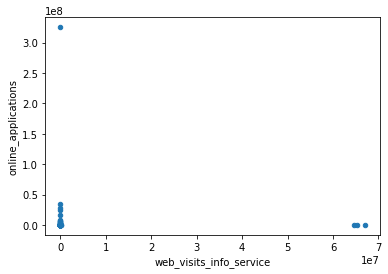

2017-2018


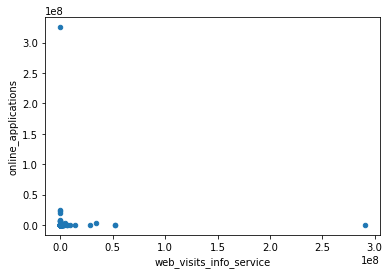

2018-2019


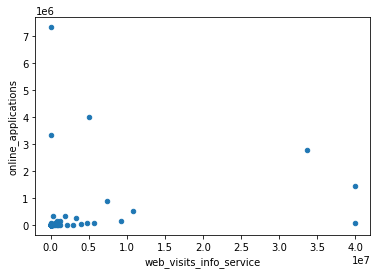

In [44]:
df_inv_onine_data_1617=df_inv_online_data_w_yr[df_inv_online_data_w_yr.fiscal_yr=='2016-2017']
df_inv_onine_data_by_year=df_inv_online_data_w_yr.groupby('fiscal_yr')
for name, group in df_inv_onine_data_by_year:
    print(name)
    group.plot(kind='scatter',x='web_visits_info_service',y='online_applications')
    plt.show()
#graph = sb.FacetGrid(data = df_inv_online_data_w_yr, col = "fiscal_yr")
#graph.map(plt.scatter, 'web_visits_info_service', 'online_applications')

In [45]:
#group by department
df_inv_onine_data_1617=df_inv_onine_data_1617.groupby('department_name_en').agg(sum)
df_inv_onine_data_1617.shape

(11, 2)

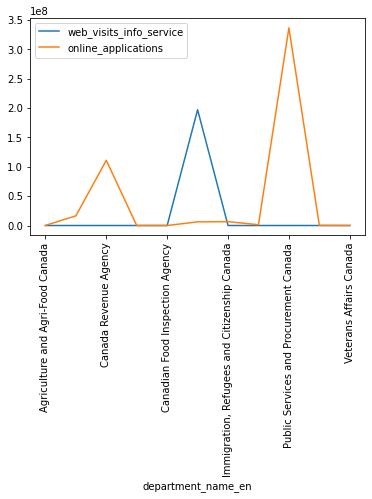

In [46]:
df_inv_onine_data_1617.plot()
plt.xticks(rotation = 90)
#plt.legend()
plt.show()

# Merge Experiment

Merged all departments together to 1) show a way to do that with quatitative data and 2) play arund with plotting multiple bar charts

Inclduing it here just so people can be see. May delete later. 

In [47]:
df_inv_apps_data = df_inv_relevantDeps[['fiscal_yr','department_name_en', 'online_applications', 'in_person_applications', 'postal_mail_applications', 'other_applications', 'total_applications']]
df_inv_apps_data.head()

,fiscal_yr,department_name_en,online_applications,in_person_applications,postal_mail_applications,other_applications,total_applications
0,2016-2017,Agriculture and Agri-Food Canada,282.0,0.0,0.0,0.0,282.0
1,2016-2017,Agriculture and Agri-Food Canada,16.0,0.0,0.0,0.0,16.0
2,2016-2017,Agriculture and Agri-Food Canada,141.0,0.0,0.0,0.0,141.0
3,2016-2017,Agriculture and Agri-Food Canada,29.0,0.0,0.0,0.0,29.0
4,2016-2017,Agriculture and Agri-Food Canada,36.0,0.0,0.0,0.0,36.0


In [26]:
#del df_inv_apps_data['department_name_en']

In [48]:
#column_list=['online_applications', 'in_person_applications', 'postal_mail_applications', 'other_applications']
#df_inv_apps_data["total_applications"]=df_inv_apps_data[column_list].sum(axis=1)

In [49]:
df_inv_apps_data_merge=df_inv_apps_data.groupby('fiscal_yr').agg(sum)
df_inv_apps_data_merge.head()

,online_applications,in_person_applications,postal_mail_applications,other_applications,total_applications
fiscal_yr,,,,,
2016-2017,478579219.0,125849035.0,74259072.0,5862.0,678693188.0
2017-2018,440649111.0,119139223.0,25571726.0,4870600.0,590230660.0
2018-2019,152912414.0,118033163.0,41274701.0,3977781.0,316198059.0


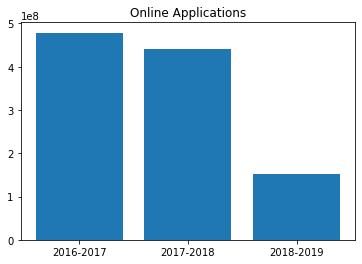

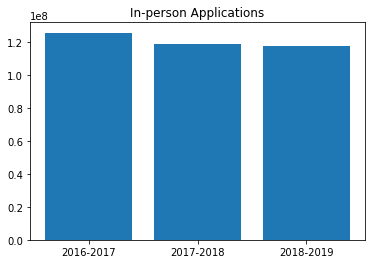

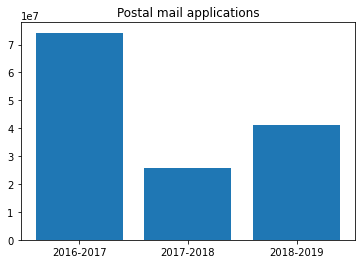

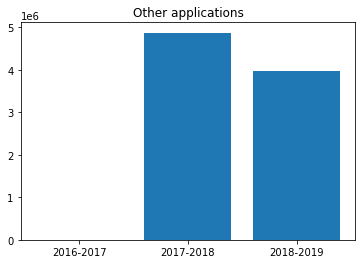

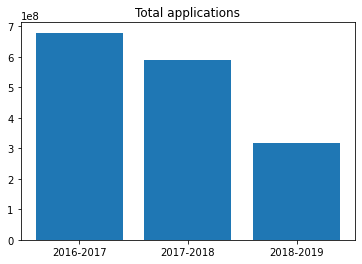

In [51]:
fig1, ax1=plt.subplots()

ax1.bar(df_inv_apps_data_merge.index, df_inv_apps_data_merge.online_applications, label='online applications')
ax1.set_title("Online Applications")
fig2,ax2=plt.subplots()
ax2.bar(df_inv_apps_data_merge.index, df_inv_apps_data_merge.in_person_applications)
ax2.set_title('In-person Applications')

fig3, ax3=plt.subplots()
ax3.bar(df_inv_apps_data_merge.index, df_inv_apps_data_merge.postal_mail_applications)
ax3.set_title("Postal mail applications")

fig4, ax4=plt.subplots()
ax4.bar(df_inv_apps_data_merge.index, df_inv_apps_data_merge.other_applications)
ax4.set_title("Other applications")

fig5, ax5=plt.subplots()
ax5.bar(df_inv_apps_data_merge.index, df_inv_apps_data_merge.total_applications)
ax5.set_title("Total applications")

plt.show()